<span style="font-size:2em;color:red;font-weight:bold">Linear Models for Classification</span>*

<span style="font-size:1.5em;font-weight:bold">Logistic regression - Linear support vector machines</span>

<span style="font-size:1.3em;font-weight:bold">Import the data</span>

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()

<span style="font-size:1.3em;font-weight:bold">Preprocessing the data</span>

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target,
                                                  stratify=cancer.target, random_state=42)

<span style="font-size:1.3em;font-weight:bold">Building the logistic model</span>

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg=LogisticRegression(solver='liblinear').fit(X_train,y_train)

<span style="font-size:1.3em;font-weight:bold">Evaluating the logistic model</span>

In [11]:
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9530516431924883
0.958041958041958


In [13]:
logreg100=LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.971830985915493
0.965034965034965


In [15]:
logreg001=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9342723004694836
0.9300699300699301


In [16]:
for C, market in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(penalty='l1',max_iter=1000,solver='liblinear',C=C).fit(X_train,y_train)
    print('for C={:.3f} train accuracy {:.2f}'.format(C,lr_l1.score(X_train,y_train)))
    print('for C={:.3f} test accuracy {:.2f}'.format(C,lr_l1.score(X_test,y_test)))

for C=0.001 train accuracy 0.91
for C=0.001 test accuracy 0.92
for C=1.000 train accuracy 0.96
for C=1.000 test accuracy 0.96
for C=100.000 train accuracy 0.99
for C=100.000 test accuracy 0.98


<span style="font-size:1.5em;font-weight:bold">Linear support vector machines</span>

<span style="font-size:1.3em;font-weight:bold">Importing the data</span>

In [18]:
from sklearn.datasets import make_blobs
import mglearn

In [19]:
%matplotlib inline

In [20]:
X,y=make_blobs(random_state=42)

<span style="font-size:1.3em;font-weight:bold">Exploring the data</span>

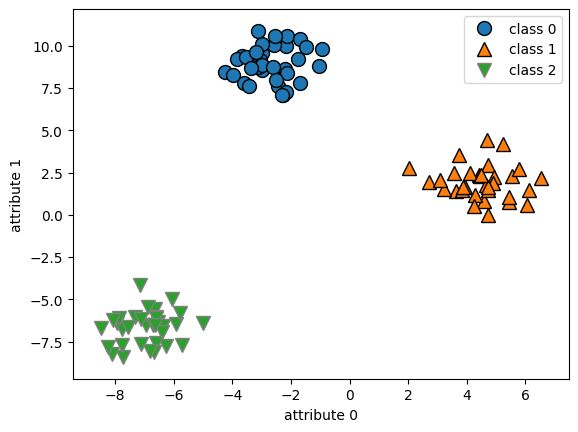

In [21]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('attribute 0')
plt.ylabel('attribute 1')
plt.legend(['class 0', 'class 1', 'class 2'])

<span style="font-size:1.3em;font-weight:bold">Building the model</span>

In [22]:
from sklearn.svm import LinearSVC

In [23]:
linear_svm=LinearSVC().fit(X,y)

c:\users\sıla\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [24]:
linear_svm.coef_

array([[-0.17492298,  0.23140791],
       [ 0.47621571, -0.0693651 ],
       [-0.18913946, -0.20400528]])

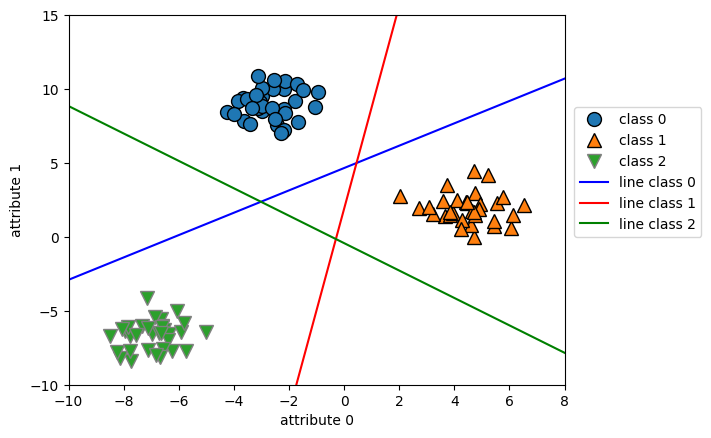

In [26]:
import numpy as np
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('attribute 0')
plt.ylabel('attribute 1')
plt.legend(['class 0','class 1','class 2','line class 0','line class 1','line class 2'],
          loc=(1.02,0.4))